#### Importing libraries

In [949]:
# pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation:
import matplotlib.pyplot as plt

# An array object of arbitrary homogeneous items
# Fast mathematical operations over arrays
# Linear Algebra, Fourier Transforms, Random Number Generation
import numpy as np

import seaborn as sns
import pandas as pd

# sklearn is a Python module integrating classical machine learning algorithms in the tightly-knit world of scientific Python packages (numpy, scipy, matplotlib).
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# Logistic Regression (aka logit, MaxEnt) classifier.
from sklearn.linear_model import LogisticRegression

# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics and distance computations.
from sklearn import metrics

#### Loading data

 The code below loads a modified version of the iris dataset which has two classes.
 

In [950]:
df_iris_flower = pd.read_csv('virginica_versicolor_iris.csv')

#### Checking dataset shape

In [951]:
print ('Data Shape: ', df_iris_flower.shape)

Data Shape:  (347, 5)


347 rows
 
5 columns

#### The describe() method returns description of the data in the DataFrame.

In [952]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

df_iris_flower.describe()

,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm)
count,347.000000,347.000000,347.000000,335.000000
mean,6.210375,2.856196,4.807781,1.619701
std,0.651948,0.331811,0.814800,0.418258
min,4.900000,2.000000,3.000000,1.000000
25%,5.700000,2.700000,4.200000,1.300000
50%,6.200000,2.900000,4.700000,1.500000
75%,6.650000,3.000000,5.350000,1.900000
max,7.900000,3.800000,6.900000,2.500000


#### Getting info about the dataset

In [953]:
df_iris_flower.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal_length (cm)  347 non-null    float64
 1   sepal_width (cm)   347 non-null    float64
 2   petal_length (cm)  347 non-null    float64
 3   petal_width (cm)   335 non-null    float64
 4   species            347 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.7+ KB


#### Checking missing data

In [954]:
df_iris_flower.isnull().sum()

sepal_length (cm)     0
sepal_width (cm)      0
petal_length (cm)     0
petal_width (cm)     12
species               0
dtype: int64

#### Replacing missing data with the mean of the existing data

In [955]:
# petal_width (cm)
df_iris_flower['petal_width (cm)'].fillna(df_iris_flower['petal_width (cm)'].mean(), inplace=True)


df_iris_flower.isnull().sum()

sepal_length (cm)    0
sepal_width (cm)     0
petal_length (cm)    0
petal_width (cm)     0
species              0
dtype: int64

Verdified that there is no null data

#### Converting data under sepcies column name to a numeric data

#### Turn species into a binary classification task

Replacing all versicolors with the value of 0.

Replacing all virginica with the value of 1. 

For all versicolors, species == 0

For all virginica, species == 1

In [956]:
import numpy as np

# where(condition, [x, y])
# Return elements chosen from x or y depending on condition

df_iris_flower['species'] = np.where(df_iris_flower['species'] == 'versicolor', 0, 1)

df_iris_flower

,sepal_length (cm),sepal_width (cm),petal_length (cm),petal_width (cm),species
0,7.0,3.2,4.7,1.400000,0
1,6.4,3.2,4.5,1.500000,0
2,6.9,3.1,4.9,1.500000,0
3,5.5,2.3,4.0,1.300000,0
4,6.5,2.8,4.6,1.500000,0
...,...,...,...,...,...
342,6.7,3.0,5.2,1.619701,1
343,6.3,2.5,5.0,1.900000,1
344,6.5,3.0,5.2,2.000000,1
345,6.2,3.4,5.4,2.300000,1


#### Plot pairwise relationships in a dataset.

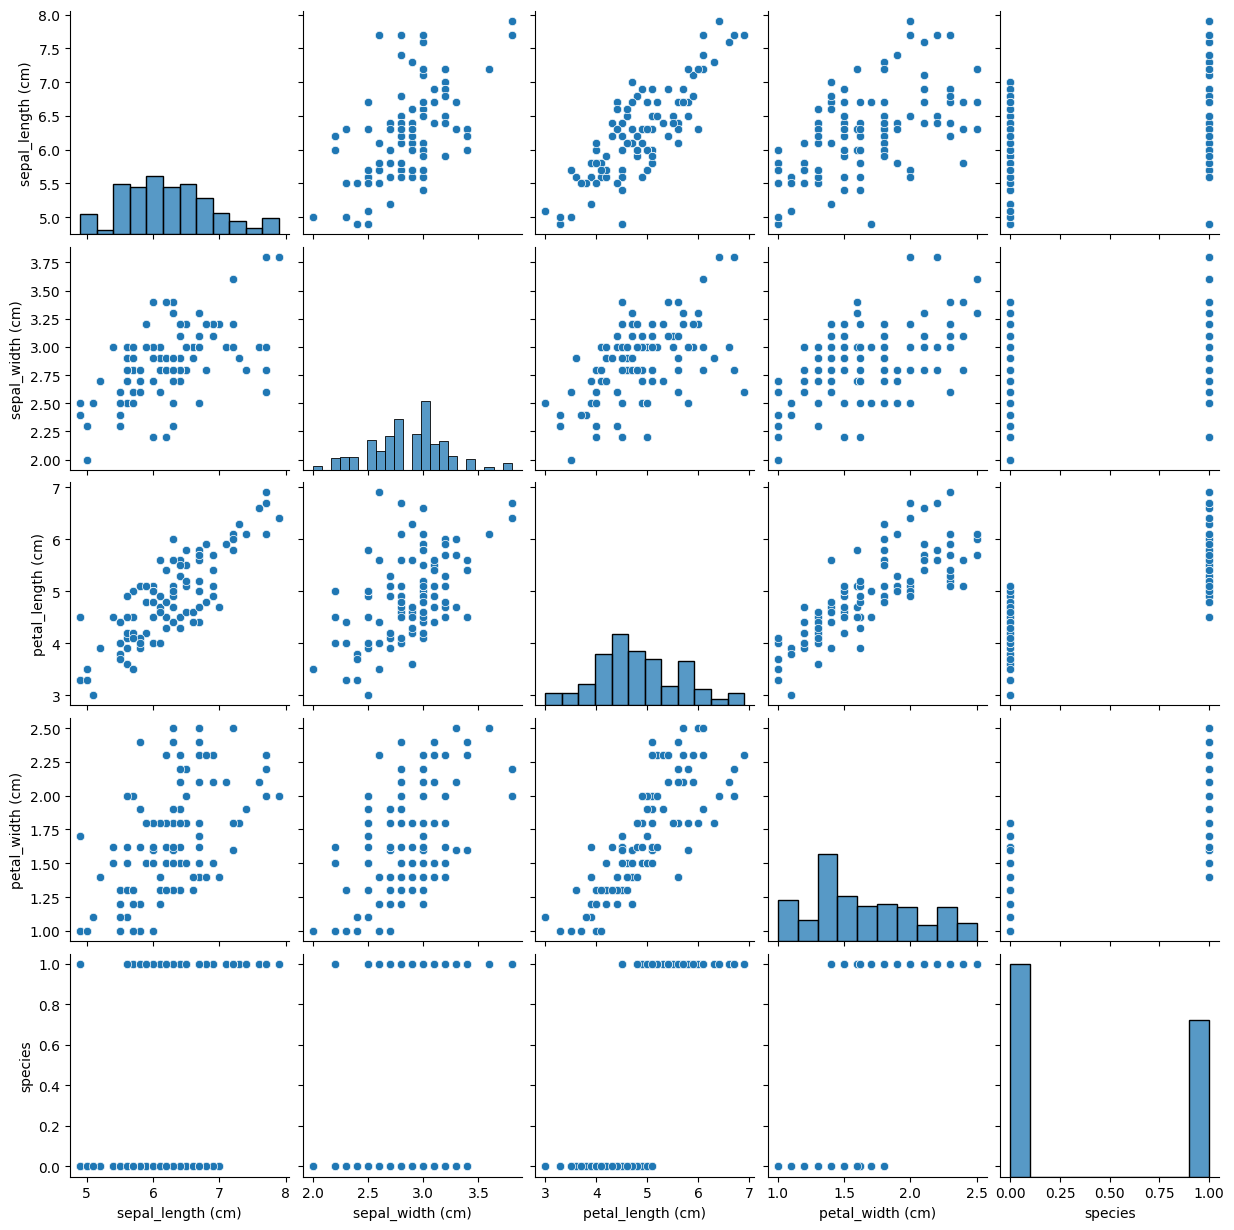

In [957]:
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes
# across a single row and the x-axes across a single column. The diagonal plots are treated

import seaborn as sb

sb.pairplot(df_iris_flower)

#### Defining the dependent (target, label, y) and independent (features, x) variables

In [958]:
df_feature = df_iris_flower['petal_width (cm)']

# df_feature = df_iris_flower.drop('species', axis=1)

# Gives a new shape to an array without changing its data.
# df_feature = df_feature.values.reshape(-1, 1)

df_label = df_iris_flower['species']

df_feature


0      1.400000
1      1.500000
2      1.500000
3      1.300000
4      1.500000
         ...   
342    1.619701
343    1.900000
344    2.000000
345    2.300000
346    1.800000
Name: petal_width (cm), Length: 347, dtype: float64

In [959]:
df_label

0      0
1      0
2      0
3      0
4      0
      ..
342    1
343    1
344    1
345    1
346    1
Name: species, Length: 347, dtype: int32

#### Splitting data into training and test sets

In [960]:
# Split arrays or matrices into random train and test subsets.

x_train, x_test, y_train, y_test = train_test_split(df_feature, df_label, random_state=0)

#### Checking y_train

In [961]:
# The labels were written out as a pandas series, which does not carry a column name

y_train

66     0
316    1
12     0
114    0
146    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: species, Length: 260, dtype: int32

#### Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

StandardScaler removes the mean and scales each feature/variable to unit variance. This operation is performed feature-wise in an independent way.
StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.

In [962]:
scaler = StandardScaler()

x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
# Fit on training set only.
scaler.fit(x_train)

# Apply transform to both the training set and the test set.

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train

array([[-0.22816495],
       [-0.22816495],
       [-1.43995819],
       [-0.71288224],
       [-0.71288224],
       [-0.22816495],
       [-1.43995819],
       [-1.43995819],
       [-0.22816495],
       [ 0.98362829],
       [-0.95524089],
       [ 0.498911  ],
       [ 0.0141937 ],
       [-0.47052359],
       [ 0.498911  ],
       [ 0.98362829],
       [-0.47052359],
       [ 1.22598694],
       [ 1.71070424],
       [-0.95524089],
       [-1.43995819],
       [-0.22816495],
       [ 0.498911  ],
       [-0.71288224],
       [ 2.19542153],
       [ 0.98362829],
       [-0.71288224],
       [ 0.98362829],
       [ 0.498911  ],
       [-0.71288224],
       [ 2.19542153],
       [ 1.95306289],
       [-0.47052359],
       [-0.71288224],
       [ 0.0141937 ],
       [ 0.0141937 ],
       [-0.71288224],
       [-0.22816495],
       [-0.47052359],
       [-0.71288224],
       [ 0.0141937 ],
       [ 1.95306289],
       [-0.95524089],
       [ 0.06194197],
       [ 0.498911  ],
       [ 1

In [963]:
x_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
y_train.head()

66     0
316    1
12     0
114    0
146    0
Name: species, dtype: int32

In [ ]:
# Function to print out results in detail

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean, std, param in zip(means, stds, params):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), param))

#### Create logistic regression object and training data by using train dataset

So far we've learned about what logistic regression is and when we should use it. Now, we're going to move from the conceptual and start thinking more about the practical, to prepare to actually fit a model in the next lesson. So we're going to start by importing logistic regression, and we'll take a look at that model object and then we'll explore some of the key hyperparameters. So to import logistic regression, just need to say from sklearn.linear_model import LogisticRegression. And then all we want to do is we want to print out that LogisticRegression object and so we'll go ahead and run this. So this is all the potential hyperparameters that we could tune. There's a lot here but compared to other algorithms, this is actually a somewhat limited list. Now I want to know that you never try to tune all of the hyperparameters. You usually just choose to tune the hyperparameters that will have the largest impact, which I'm going to be calling out in the lessons throughout the rest of these chapters. For many hyperparameters, the default setting will do just fine. So you can see all the default values in the printouts here. So for this chapter, we're only going to focus on one hyperparameter. We're going to focus on this C hyperparameter. So you can see here that has a default value of one. We'll explore that in just a minute. But one other thing that I want to illustrate is some of the methods included with the LogisticRegression object. So by calling dir and then LogisticRegression, we can see all of the attributes and methods contained within that object. And I want to quickly call your attention to fit and predict. Every sklearn algorithm will have this dot fit and dot predict method. All you have to do is pass in your training features and your training labels to a dot fit in order to fit your model. Then once you have that stored model, all you have to do is pass in your test or validation set features into predict to generate some new predictions. Okay, let's dive into exploring what the C hyperparameter actually is. So the C hyperparameter is a regularization parameter that controls how closely the model fits to the training data. So if you're not familiar with regularization, it's quite common in machine learning. And it's a technique used to reduce overfitting. Overfitting occurs when a model fits too closely to the training data. So regularization combats this overfitting by discouraging overly complex models in some way. There's more details on this in the applied machine learning foundations course. Now calling C a regularization parameter is actually slightly misleading as it's actually one over Lambda where Lambda is actually the regularization parameter. So what that means is when Lambda goes to zero, then that means C will go towards infinity or will increase and what that indicates is low regularization which is going to lead to more complex models and more likely to overfit. So again, C is called a regularization parameter but it's a little bit counterintuitive because as regularization decreases C actually increases. Now looking at the flip side, high values of Lambda will generate low values of C which means high regularization, low complexity and more likely to under fit. If these overfit and under fit terms are unfamiliar to you, they just have to do with how closely the model will fit to the training data. Lastly, let's see what this actually means for some data. Each of these plots, show a logistic regression models ability to classify flowers based on the pedal length and the pedal width. So ideally what we would want to see is down here in the bottom right. This model is properly drawing a boundary between each of these three groups. So the green points kind of have their own segment. The blue points have their own segments and lastly the red points have their own portion of the plot. Now it's achieving that with a high value of C of 100, which means low Lambda and low regularization. Now, as we kind of cycle through these plots and we make C smaller and smaller, in other words that means we're increasing the regularization, this given models having a harder and harder time correctly classifying these flower types. If you look all the way to the top left, that's the smallest C parameter that we have, which is going to mean the highest regularization that we have. The models having a very hard time splitting these into three groups. Essentially all it does is it splits the plot in half, and it really doesn't understand how to split these points into different segments. So again, very low C value means high regularization and means more likely to under fit. Now recall the default setting is at one but we can see based on this plot that the model actually does a better job grouping these when C is equal to a hundred. So that is why hyperparameter tuning is necessary here. So we'll dive into testing logistic regression on our data in the next lesson.

#### Train and evaluate the Logistic Regression

In [ ]:
# Logistic Regression (aka logit, MaxEnt) classifier.
# cv stands for cross validation

from sklearn.model_selection import GridSearchCV



lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)

lr_model = cv.fit(x_train.reshape(-1, 1), y_train.values.ravel())

print_results(lr_model)


BEST PARAMS: {'C': 0.1}

0.585 (+/-0.019) for {'C': 0.001}
0.842 (+/-0.078) for {'C': 0.01}
0.923 (+/-0.024) for {'C': 0.1}
0.923 (+/-0.024) for {'C': 1}
0.915 (+/-0.052) for {'C': 10}
0.915 (+/-0.052) for {'C': 100}
0.915 (+/-0.052) for {'C': 1000}


In [ ]:
lr_model.best_estimator_

LogisticRegression(C=10)

In [ ]:
import joblib

joblib.dump(lr_model.best_estimator_, 'LG_model.pkl')

['LG_model.pkl']

In [964]:
# Access a group of rows and columns by label(s) or a boolean array.
# .loc[] is primarily label based, but may also be used with a boolean array.

df_combined = pd.DataFrame()
df_combined.loc[:, 'petal length (cm)'] = x_train.reshape(-1)
df_combined.loc[:, 'label'] = y_train.values
df_combined['log_preds'] = pd.DataFrame(cv.predict_proba(x_train))[1]

df_combined


,petal length (cm),label,log_preds
0,-0.228165,0,0.291428
1,-0.228165,1,0.291428
2,-1.439958,0,0.034640
3,-0.712882,0,0.134229
4,-0.712882,0,0.134229
...,...,...,...
255,0.498911,1,0.639907
256,-0.955241,0,0.086917
257,-1.439958,0,0.034640
258,0.061942,0,0.424446


#### Visualize the Logistic Tree for train data set

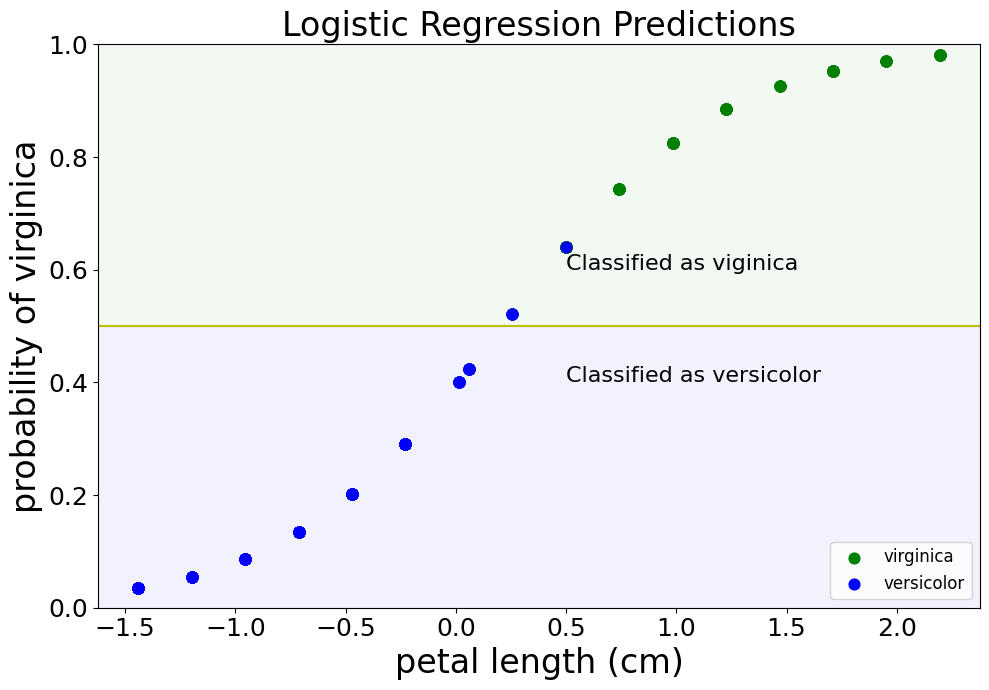

In [965]:
# Create a figure and a set of subplots.
# This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.
# sepal_length (cm)	sepal_width (cm)	petal_length (cm)	petal_width (cm)


fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));
versicolor_filter = df_combined['label'] == 0
virginica_filter = df_combined['label'] == 1


# A scatter plot of *y* vs. *x* with varying marker size and/or color.
ax.scatter(df_combined.loc[virginica_filter, 'petal length (cm)'].values,
                df_combined.loc[virginica_filter, 'log_preds'].values,
            color = 'g',
            s = 60,
            label = 'virginica')

# A scatter plot of *y* vs. *x* with varying marker size and/or color.
ax.scatter(df_combined.loc[versicolor_filter, 'petal length (cm)'].values,
                df_combined.loc[versicolor_filter, 'log_preds'].values,
            color = 'b',
            s = 60,
            label = 'versicolor')

# Add a horizontal line across the Axes.
ax.axhline(y = .5, c = 'y')

# Add a horizontal span (rectangle) across the Axes.
ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')

# Add text to the Axes.
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

# Set the y-axis view limits.
ax.set_ylim(0,1)

# Place a legend on the Axes.
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)

# Change the appearance of ticks, tick labels, and gridlines.
ax.tick_params(labelsize = 18)

# Set the label for the x-axis.
ax.set_xlabel('petal length (cm)', fontsize = 24)

# Set the label for the y-axis.
ax.set_ylabel('probability of virginica', fontsize = 24)

# Set a title for the Axes.
ax.set_title('Logistic Regression Predictions', fontsize = 24)

# Adjust the padding between and around subplots.
fig.tight_layout()   

#### Checking score

In [ ]:
# Checking score of the model on train data set
lr_model.score(x_train, y_train)

0.9846153846153847

In [ ]:
# Checking score of the model on test data set
lr_model.score(x_test, y_test)

0.9310344827586207

#### Prediction and probability

In [ ]:
for i in x_test:
    print('prediction :', cv.predict(x_test))



prediction : [0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 1]
prediction : [0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 1]
prediction : [0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 1]
prediction : [0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 1 1]


In [ ]:
for i in x_test:
    print('probability : ', cv.predict_proba(x_test))

probability :  [[9.46177484e-01 5.38225164e-02]
 [1.77710054e-02 9.82228995e-01]
 [2.29275026e-04 9.99770725e-01]
 [6.44583632e-01 3.55416368e-01]
 [9.99602690e-01 3.97310281e-04]
 [9.97869724e-01 2.13027609e-03]
 [1.70330739e-01 8.29669261e-01]
 [5.02402221e-04 9.99497598e-01]
 [9.98260067e-01 1.73993312e-03]
 [9.98625907e-01 1.37409272e-03]
 [1.66436965e-03 9.98335630e-01]
 [9.95505290e-01 4.49470994e-03]
 [9.92297088e-01 7.70291243e-03]
 [9.78280695e-01 2.17193050e-02]
 [6.04901543e-03 9.93950985e-01]
 [1.37423110e-05 9.99986258e-01]
 [9.99954738e-01 4.52619301e-05]
 [9.47899673e-04 9.99052100e-01]
 [9.99037173e-01 9.62827427e-04]
 [1.12848657e-04 9.99887151e-01]
 [1.16113884e-02 9.88388612e-01]
 [1.40476460e-03 9.98595235e-01]
 [9.99209180e-01 7.90819625e-04]
 [6.61804356e-04 9.99338196e-01]
 [1.32087211e-03 9.98679128e-01]
 [9.71566337e-01 2.84336633e-02]
 [9.98625907e-01 1.37409272e-03]
 [9.71566337e-01 2.84336633e-02]
 [9.52251841e-01 4.77481585e-02]
 [4.61392295e-01 5.38607705e

In [966]:
# Access a group of rows and columns by label(s) or a boolean array.
# .loc[] is primarily label based, but may also be used with a boolean array.

df_combined = pd.DataFrame()
df_combined.loc[:, 'petal length (cm)'] = x_test.reshape(-1)
df_combined.loc[:, 'label'] = y_test.values
df_combined['log_preds'] = pd.DataFrame(cv.predict_proba(x_test))[1]

In [ ]:
df_combined.head()

,petal length (cm),label,log_preds
0,0.014194,0,0.401156
1,0.498911,1,0.639907
2,1.953063,1,0.970739
3,-0.228165,0,0.291428
4,-0.955241,0,0.086917


#### Plotting logistic regression

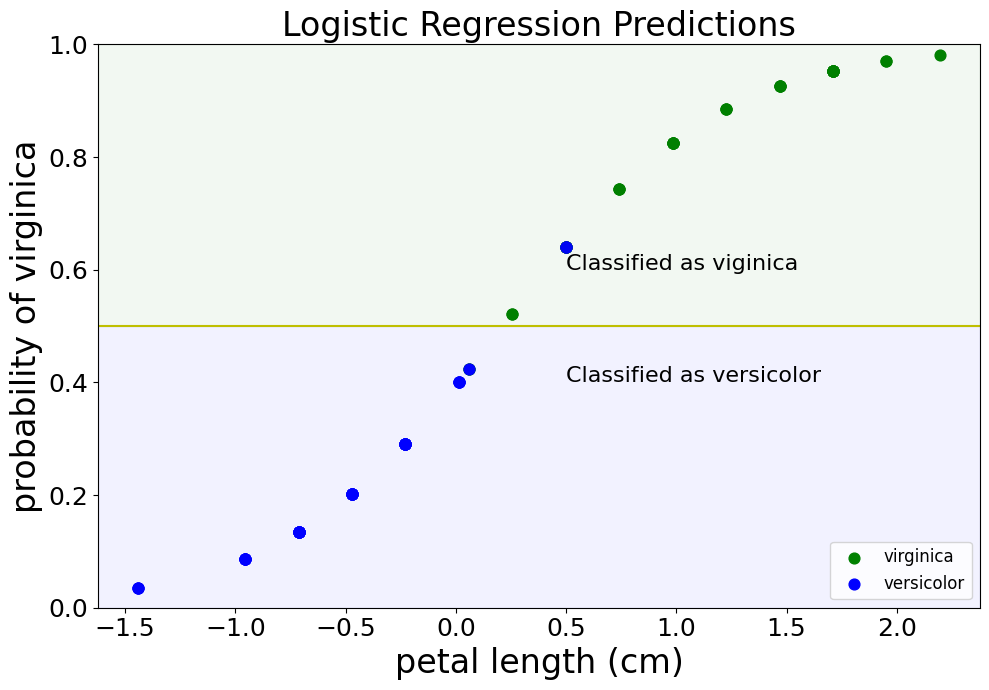

In [ ]:
# Create a figure and a set of subplots.
# This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


versicolor_filter = df_combined['label'] == 0
virginica_filter = df_combined['label'] == 1


# A scatter plot of *y* vs. *x* with varying marker size and/or color.
ax.scatter(df_combined.loc[virginica_filter, 'petal length (cm)'].values,
            df_combined.loc[virginica_filter, 'log_preds'].values,
           color = 'g',
           s = 60,
           label = 'virginica')

# A scatter plot of *y* vs. *x* with varying marker size and/or color.
ax.scatter(df_combined.loc[versicolor_filter, 'petal length (cm)'].values,
            df_combined.loc[versicolor_filter, 'log_preds'].values,
           color = 'b',
           s = 60,
           label = 'versicolor')

# Add a horizontal line across the Axes.
ax.axhline(y = .5, c = 'y')

# Add a horizontal span (rectangle) across the Axes.
ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')

# Add text to the Axes.
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

# Set the y-axis view limits.
ax.set_ylim(0,1)

# Place a legend on the Axes.
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)

# Change the appearance of ticks, tick labels, and gridlines.
ax.tick_params(labelsize = 18)

# Set the label for the x-axis.
ax.set_xlabel('petal length (cm)', fontsize = 24)

# Set the label for the y-axis.
ax.set_ylabel('probability of virginica', fontsize = 24)

# Set a title for the Axes.
ax.set_title('Logistic Regression Predictions', fontsize = 24)

# Adjust the padding between and around subplots.
fig.tight_layout()

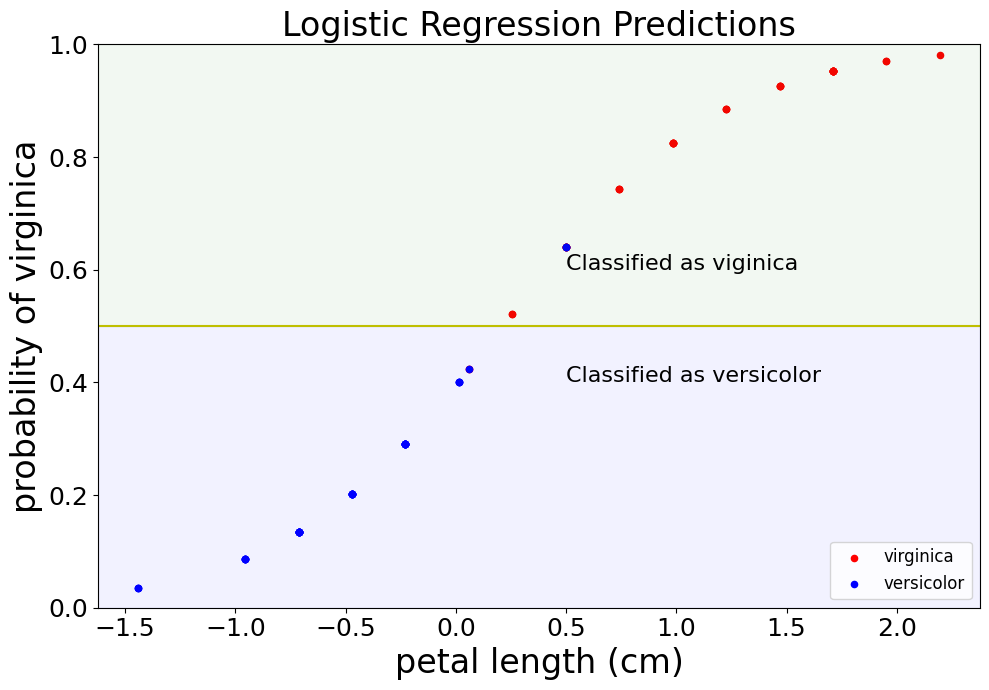

In [ ]:
# Create a figure and a set of subplots.
# This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


virginica_filter = df_combined['label'] == 1
versicolor_filter = df_combined['label'] == 0

# A scatter plot of *y* vs. *x* with varying marker size and/or color.
ax.scatter(df_combined.loc[virginica_filter, 'petal length (cm)'].values,
            df_combined.loc[virginica_filter, 'log_preds'].values,
           color = 'r',
           s = 20,
           label = 'virginica')

# A scatter plot of *y* vs. *x* with varying marker size and/or color.
ax.scatter(df_combined.loc[versicolor_filter, 'petal length (cm)'].values,
            df_combined.loc[versicolor_filter, 'log_preds'].values,
           color = 'b',
           s = 20,
           label = 'versicolor')

# Add a horizontal line across the Axes.
ax.axhline(y = .5, c = 'y')

# Add a horizontal span (rectangle) across the Axes.
ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')

# Add text to the Axes.
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

# Set the y-axis view limits.
ax.set_ylim(0,1)

# Place a legend on the Axes.
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)

# Change the appearance of ticks, tick labels, and gridlines.
ax.tick_params(labelsize = 18)

# Set the label for the x-axis.
ax.set_xlabel('petal length (cm)', fontsize = 24)

# Set the label for the y-axis.
ax.set_ylabel('probability of virginica', fontsize = 24)

# Set a title for the Axes.
ax.set_title('Logistic Regression Predictions', fontsize = 24)

# Adjust the padding between and around subplots.
fig.tight_layout()

#### Checking score

In [ ]:
score = cv.score(x_test, y_test)
print(score)

0.9425287356321839


#### Heatmap

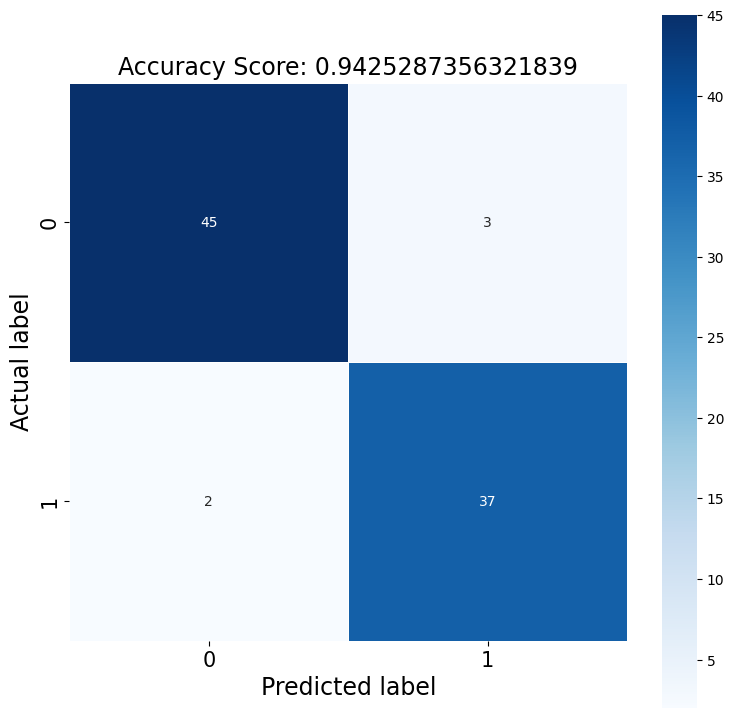

In [ ]:
# Compute confusion matrix to evaluate the accuracy of a classification.
cm = metrics.confusion_matrix(y_test, cv.predict(x_test))

# Create a new figure, or activate an existing figure.
plt.figure(figsize=(9,9))

# Plot rectangular data as a color-encoded matrix.
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)